In [2]:
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
from operator import itemgetter
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [23]:
conn = sqlite3.connect('../../Data/Experiment_3/Bryan_exp3_remote.db')
dat = pd.read_sql('SELECT * FROM trials A INNER JOIN subjects B ON A.subject_id = B.id WHERE B.completion=1', con=conn)

# Only use rows where comprehension questions were answered correctly
anim = dat.loc[(dat.anim_check == 1) & (dat.tower_check == 1 ) & (dat.agent_check==1)]
inanim = dat[['inanim' in x for x in dat.exp_cond]].loc[(dat.anim_check == 1) & (dat.tower_check == 1 )]
inanim['exp_cond'] = 'inanimate'
dat = pd.concat([anim, inanim])
# remove duplicate columns that came from the SQL inner join
dat = pd.DataFrame(dat.values[:,~dat.columns.duplicated()], columns=dat.columns[~dat.columns.duplicated()])
xx = dat.groupby('prolificID').count().id > 1
extrasubs = xx.loc[xx.values == True].index.tolist()
for subj in extrasubs:
    b = dat.loc[dat.prolificID == subj].index == dat.loc[dat.prolificID == subj].index.max()
dat.drop(dat.loc[dat.prolificID == subj].index[~b], inplace=True)
dat.reset_index(drop=True, inplace=True)

dat.groupby('exp_cond').count()

,id,prolificID,jspsychID,time_elapse,stim1,stim2,Q0,Q1,Q2,Q3,...,Q3_rt,anim_check,tower_check,agent_check,sub_feedback1,sub_feedback2,subject_id,date,completion,compelete_time
exp_cond,,,,,,,,,,,,,,,,,,,,,
animate_moral,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,0
animate_rational,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,0
inanimate,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,100,100,105,105,105,0


In [4]:
for prompt in ["Q0", "Q1", "Q2","Q3"]:
    dat[prompt] = dat[prompt].apply(literal_eval)
    dat['num_moves'+prompt] = [len(x) for x in dat[prompt]]
    dat['Q'+prompt] = dat[prompt].map(lambda x: x[-1])


#dat['exp_cond'] = dat.exp_cond.map(lambda x: x.split('_'))
#dat[['animacy', 'norm_violation']] = dat['exp_cond'].transform({'item1': itemgetter(0), 'item2': itemgetter(1)})

In [6]:
dat_long = dat.melt(id_vars=['subject_id', 'exp_cond'],
                    value_vars=['QQ0','QQ1','QQ2','QQ3'],
                    var_name='prompt', value_name='rating')

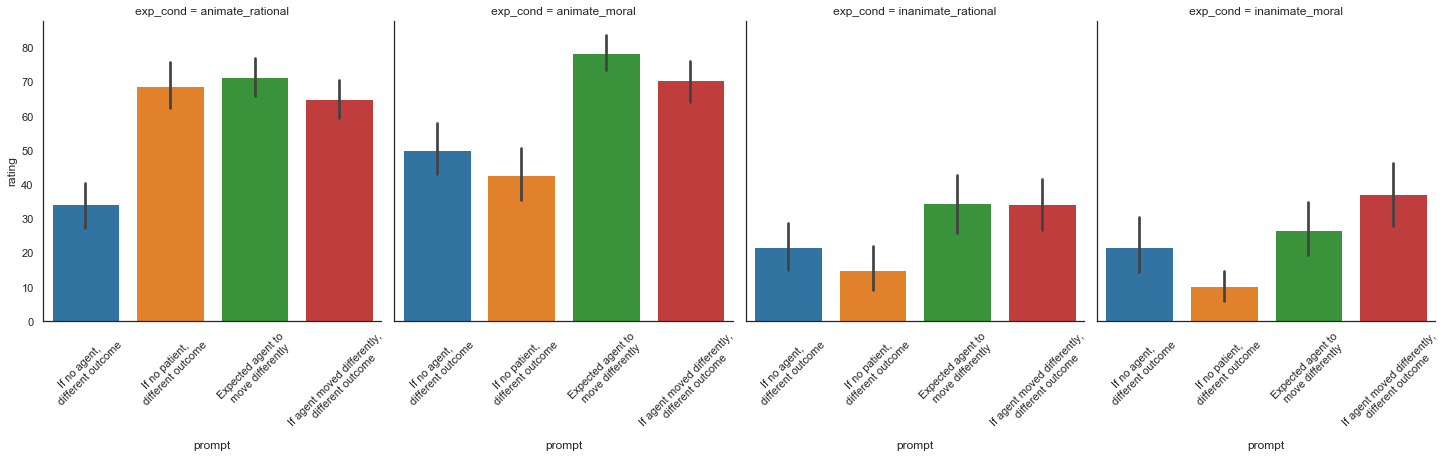

In [7]:
g = sns.catplot(x='prompt', y='rating', col='exp_cond',data=dat_long, kind='bar')
g.set_xticklabels(['If no agent, \n different outcome',
              'If no patient,\n different outcome',
              'Expected agent to\n move differently',
              'If agent moved differently,\n different outcome'], rotation=45)

In [9]:

xx = dat.groupby('prolificID').count().id > 1
extrasubs = xx.loc[xx.values == True].index.tolist()

for subj in extrasubs:
    dat.drop(dat.loc[dat.prolificID == subj].index[0], inplace=True)
dat.reset_index(drop=True, inplace=True)

KeyError: 'cause_agent'

In [ ]:
dat_long = dat.melt(id_vars=['prolificID', 'animacy', 'norm_violation'], value_vars=['agent', 'patient'],
                    var_name='candidate', value_name='causal rating')
sns.catplot(x='norm_violation', y='causal rating', hue='candidate', col='animacy', kind='bar', data=dat_long)
plt.xticks()